In [1]:
#importing required packages & libraries
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np 
from ipykernel import kernelapp as app
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
import warnings
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams

In [2]:
import os
os.getcwd()

'C:\\Users\\rashm'

In [3]:
import os
print(os.listdir("C:\\Users\\rashm\\input"))

['apy.csv', 'poptable.csv']


In [4]:
#loading dataset
df=pd.read_csv(r'C:\Users\rashm\Downloads\apy.csv\apy.csv')

In [5]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899


# Understanding existing data

In [6]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165


In [7]:
df.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88


In [8]:

df.shape

(246091, 7)

In [9]:
df.describe()

,Crop_Year,Area
count,246091.000000,2.460910e+05
mean,2005.643018,1.200282e+04
std,4.952164,5.052340e+04
min,1997.000000,4.000000e-02
25%,2002.000000,8.000000e+01
50%,2006.000000,5.820000e+02
75%,2010.000000,4.392000e+03
max,2015.000000,8.580100e+06


In [10]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production        object
dtype: object

In [11]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 13.1+ MB


In [13]:
#converting production to numeric type
df['Production']=pd.to_numeric(df['Production'],errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242364 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


# Exploratory data analysis

In [15]:
unique_crop_list = df["Crop"].unique()
print("Total number of unique crops - ", len(unique_crop_list))
print("\nWe have following unique crops in the dataset - \n", unique_crop_list)

Total number of unique crops -  124

We have following unique crops in the dataset - 
 ['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sannhamp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Jute' 'Peas & 

In [16]:
unique_states = df["State_Name"].unique()
print("Total number of states and union territories found in records - ", len(unique_states))
print("\n Name of unique states and union territories in the record dataset -\n", unique_states)

Total number of states and union territories found in records -  33

 Name of unique states and union territories in the record dataset -
 ['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [17]:
unique_districts = df["District_Name"].unique()
print("Total number of districts found in records - ", len(unique_districts))
print("\n Name of unique districts in the record dataset -\n", unique_districts)

Total number of districts found in records -  646

 Name of unique districts in the record dataset -
 ['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG' 'BAKSA' 'BARPETA'
 'BONGAIGAON' 'CACHAR' 'CHIRANG' 'DARRANG' 'DHEMAJI' 'DHUBRI' 'DIBRUGARH'
 'DIMA HASAO' 'GOALPARA' 'GOLAGHAT' 'HAILAKANDI' 'JORHAT' 'KAMRUP'
 'KAMRUP METRO' 'KARBI ANGLONG' 'KARIMGANJ' 'KOKRAJHAR' 'LAKHIMPUR'
 'MARIGAON' 'NAGAON' 'NALBARI' 'SIVASAGAR' 'SONITPUR' 'TINSUKIA'
 'UDALGURI' 'ARARIA' 'ARWAL' 'AURANGABAD' 'BANKA' 'BEGUSARAI' 'BHAGALPUR'
 'BHOJPUR' 'BUXAR' 'DARBHANGA' 'GAYA' 'GOPALGANJ' 'JAMUI' 'JEHANABAD'
 

In [18]:
df["Crop"].value_counts().head()

Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
Name: Crop, dtype: int64

In [19]:
total_production_list = []
for state in unique_states:
    total_crop = df.loc[df["State_Name"] == state, "Production"].sum()
    total_production_list.append(total_crop)
    

crop_production_df = pd.DataFrame({"State" : unique_states, 
             "Total Crop Production" : total_production_list})

In [20]:
crop_production_df

,State,Total Crop Production
0,Andaman and Nicobar Islands,7.182232e+08
1,Andhra Pradesh,1.732459e+10
2,Arunachal Pradesh,6.823913e+06
3,Assam,2.111752e+09
4,Bihar,3.664836e+08
5,Chandigarh,6.395650e+04
6,Chhattisgarh,1.009519e+08
7,Dadra and Nagar Haveli,1.847871e+06
8,Goa,5.057558e+08
9,Gujarat,5.242913e+08


In [21]:
crop_production_df.sort_values("Total Crop Production", ascending = False).head()

,State,Total Crop Production
15,Kerala,9.788005e+10
1,Andhra Pradesh,1.732459e+10
27,Tamil Nadu,1.207644e+10
30,Uttar Pradesh,3.234493e+09
3,Assam,2.111752e+09


In [22]:
agri_rice_df = df[df["Crop"] == "Rice"]
agri_rice_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57
...,...,...,...,...,...,...,...
246049,West Bengal,PURULIA,2013,Summer,Rice,516.00,1274.00
246052,West Bengal,PURULIA,2013,Winter,Rice,302274.00,730136.00
246058,West Bengal,PURULIA,2014,Autumn,Rice,264.00,721.00
246086,West Bengal,PURULIA,2014,Summer,Rice,306.00,801.00


In [23]:
#Get unique list of states with rice production
unique_rice_growing_states = list(agri_rice_df["State_Name"].unique())

In [24]:
#Summation of rice production records for each respective states 
total_rice_production = []
for state in unique_rice_growing_states:
    total_rice_crop = agri_rice_df.loc[agri_rice_df["State_Name"] == state, "Production"].sum()
    total_rice_production.append(total_rice_crop)

In [25]:
#Create a dataframe with required information
rice_crop_production_df = pd.DataFrame({"State" : unique_rice_growing_states, 
             "Total Rice Production" : total_rice_production})


In [26]:
rice_crop_production_df

,State,Total Rice Production
0,Andaman and Nicobar Islands,2.230061e+05
1,Andhra Pradesh,1.437425e+08
2,Arunachal Pradesh,2.709477e+06
3,Assam,7.180109e+07
4,Bihar,9.202292e+07
5,Chandigarh,3.853000e+03
6,Chhattisgarh,8.149862e+07
7,Dadra and Nagar Haveli,4.548650e+05
8,Goa,1.432244e+06
9,Gujarat,1.908420e+07


In [27]:
rice_crop_production_df.sort_values("Total Rice Production", ascending = False).head()

,State,Total Rice Production
32,West Bengal,258092849.0
30,Uttar Pradesh,218793359.0
24,Punjab,179702000.0
1,Andhra Pradesh,143742455.0
22,Odisha,119422742.0


In [28]:
unique_year_list = list(df["Crop_Year"].unique())
print(unique_year_list)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999, 2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015]


In [29]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [30]:
yearly_production_list = []
for year in unique_year_list:
    total_yearly_production = df.loc[df["Crop_Year"] == year, "Production"].sum()
    yearly_production_list.append(total_yearly_production)

In [31]:
yearly_production_df = pd.DataFrame({"year" : unique_year_list, 
                                   "total crop production" : yearly_production_list})

In [32]:
yearly_production_df

,year,total crop production
0,2000,7.449709e+09
1,2001,7.465541e+09
2,2002,7.696955e+09
3,2003,7.917974e+09
4,2004,8.189462e+09
5,2005,8.043757e+09
6,2006,8.681913e+09
7,2010,6.307609e+09
8,1997,8.512329e+08
9,1998,5.825321e+09


In [33]:
yearly_production_df.sort_values("total crop production", ascending = False).head()

,year,total crop production
14,2011,1.430890e+10
16,2013,1.290359e+10
6,2006,8.681913e+09
17,2014,8.664541e+09
4,2004,8.189462e+09


In [34]:
yearly_production_df.sort_values("total crop production", ascending = True).head()

,year,total crop production
18,2015,6.935065e+06
8,1997,8.512329e+08
9,1998,5.825321e+09
7,2010,6.307609e+09
10,1999,6.434666e+09


# Data preprocessing 

In [35]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [36]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3727
dtype: int64

In [37]:
df['Production'].fillna((df['Production'].mean()),inplace=True)


In [38]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [39]:
df['yield']=df['Production']/df['Area']

In [40]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167


# Data visualisation

In [41]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167


In [42]:
#grouping area and production for each year by mean
data=df.groupby(['Crop_Year'])['Area','Production'].mean()
data=data.reset_index(level=0, inplace=False)
data

<ipython-input-42-ae108dc10b37>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data=df.groupby(['Crop_Year'])['Area','Production'].mean()


,Crop_Year,Area,Production
0,1997,26038.324081,9.565489e+04
1,1998,14479.153906,5.187876e+05
2,1999,12678.074790,5.176005e+05
3,2000,12102.612169,5.499247e+05
4,2001,12371.499489,5.617207e+05
5,2002,9463.680476,4.664143e+05
6,2003,9954.769395,4.630175e+05
7,2004,11891.933465,5.908003e+05
8,2005,11822.333236,5.946584e+05
9,2006,11913.672644,6.202100e+05


In [43]:
#calulation cpi
data['CPI']=data['Production']/data['Area']
data.head()

,Crop_Year,Area,Production,CPI
0,1997,26038.324081,95654.894483,3.673619
1,1998,14479.153906,518787.576456,35.829965
2,1999,12678.074790,517600.535858,40.826430
3,2000,12102.612169,549924.676487,45.438511
4,2001,12371.499489,561720.723302,45.404417


In [44]:
data.describe()

,Crop_Year,Area,Production,CPI
count,19.000000,19.000000,1.900000e+01,19.000000
mean,2006.000000,12141.402985,5.491844e+05,48.057394
std,5.627314,3633.397954,2.344955e+05,22.804163
min,1997.000000,8187.362989,1.337644e+04,1.633791
25%,2001.500000,10531.577629,4.751576e+05,43.115424
50%,2006.000000,11768.527148,5.499247e+05,46.512124
75%,2010.500000,12237.055829,6.069004e+05,51.179128
max,2015.000000,26038.324081,1.028499e+06,94.200886


<AxesSubplot:xlabel='CPI'>

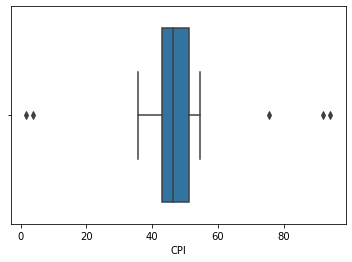

In [45]:
#boxplot plotting
import seaborn as sns
sns.boxplot(x=data['CPI'])

In [46]:
data = data[np.isfinite(data['CPI'])]
data=data[data.CPI >43]
data=data[data.CPI <51]
data.set_index('Crop_Year')
data

,Crop_Year,Area,Production,CPI
3,2000,12102.612169,549924.676487,45.438511
4,2001,12371.499489,561720.723302,45.404417
5,2002,9463.680476,466414.261529,49.284659
6,2003,9954.769395,463017.466713,46.512124
7,2004,11891.933465,590800.327190,49.680763
8,2005,11822.333236,594658.401495,50.299580
10,2007,10513.848637,483900.858474,46.025093
11,2008,11768.527148,543190.185319,46.156174
12,2009,11738.077997,557083.112055,47.459483


array([[<AxesSubplot:title={'center':'Crop_Year'}>,
        <AxesSubplot:title={'center':'Area'}>],
       [<AxesSubplot:title={'center':'Production'}>,
        <AxesSubplot:title={'center':'CPI'}>]], dtype=object)

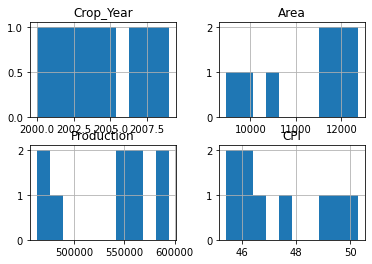

In [47]:
#plotting histogram
data.hist()

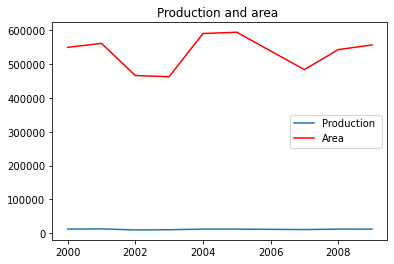

In [48]:
#comparison of production and area for each year
x_axis=data.Crop_Year
y_axis=data.Area

y1_axis=data.Production

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')

plt.title("Production and area ")
plt.legend(["Production ","Area"])
plt.show()

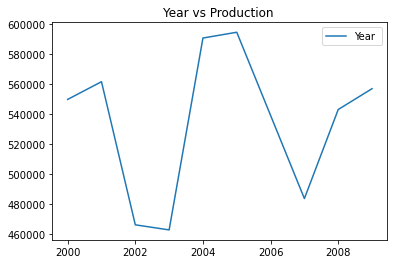

In [49]:
#plotting of production
x_axis=data.Crop_Year
y1_axis=data.Production



plt.plot(x_axis,y1_axis)

plt.title("Year vs Production ")
plt.legend(["Year ","Production"])
plt.show()


In [50]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
yield            0
dtype: int64

In [51]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0,2.617647
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0,0.738437
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,50.154321
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0,2.141848


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  float64
 7   yield          246091 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.0+ MB


In [53]:
import seaborn as sns


<AxesSubplot:xlabel='Season', ylabel='count'>

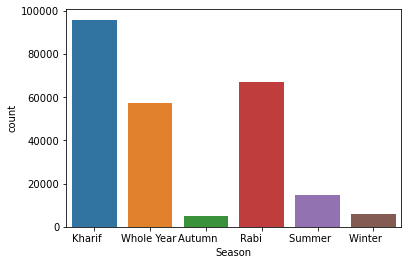

In [54]:
sns.countplot(x='Season',data=df)

<AxesSubplot:xlabel='Crop', ylabel='count'>

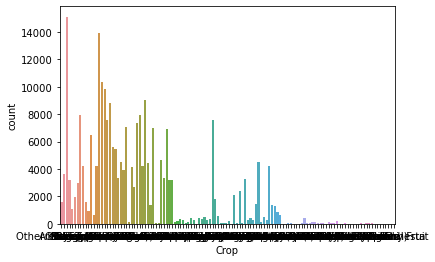

In [55]:
sns.countplot(x='Crop',data=df)

# Data Preprocessing 

In [56]:
df1=df[df['Crop_Year']>=2004]
df1

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,yield
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,1.370797
37,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Arecanut,1264.70,805.85,0.637187
38,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Banana,66.42,404.12,6.084312
39,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Black pepper,85.00,15.86,0.186588
40,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Cashewnut,683.50,197.90,0.289539
...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.00,801.00,2.617647
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.00,463.00,0.738437
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.00,16250.00,50.154321
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.00,597899.00,2.141848


In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152167 entries, 36 to 246090
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     152167 non-null  object 
 1   District_Name  152167 non-null  object 
 2   Crop_Year      152167 non-null  int64  
 3   Season         152167 non-null  object 
 4   Crop           152167 non-null  object 
 5   Area           152167 non-null  float64
 6   Production     152167 non-null  float64
 7   yield          152167 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.4+ MB


In [58]:
df1.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
yield            0
dtype: int64

In [59]:
df1=df1.join(pd.get_dummies(df1['District_Name']))
df1=df1.join(pd.get_dummies(df1['Crop']))
df1=df1.join(pd.get_dummies(df1['State_Name']))


In [60]:
df1

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,yield,24 PARAGANAS NORTH,24 PARAGANAS SOUTH,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,1.370797,0,0,...,0,0,0,0,0,0,0,0,0,0
37,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Arecanut,1264.70,805.85,0.637187,0,0,...,0,0,0,0,0,0,0,0,0,0
38,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Banana,66.42,404.12,6.084312,0,0,...,0,0,0,0,0,0,0,0,0,0
39,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Black pepper,85.00,15.86,0.186588,0,0,...,0,0,0,0,0,0,0,0,0,0
40,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Cashewnut,683.50,197.90,0.289539,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.00,801.00,2.617647,0,0,...,0,0,0,0,0,0,0,0,0,1
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.00,463.00,0.738437,0,0,...,0,0,0,0,0,0,0,0,0,1
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.00,16250.00,50.154321,0,0,...,0,0,0,0,0,0,0,0,0,1
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.00,597899.00,2.141848,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
df1=df1.drop('District_Name',axis=1)

In [62]:
df1.iloc[1:3, 660:680]


,Cabbage,Cardamom,Cashewnut,Castor seed,Coconut,Colocosia,Coriander,Cotton(lint),Cowpea(Lobia),Drum Stick,Dry chillies,Dry ginger,Garlic,Ginger,Gram,Grapes,Groundnut,Guar seed,Horse-gram,Jack Fruit
37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
from sklearn import preprocessing


In [64]:
def label_encoder(df, column_name):

    label_encoder = preprocessing.LabelEncoder()

    df[column_name]= label_encoder.fit_transform(df[column_name])
    print(column_name)
    for i in range(len(df[column_name].unique())):
        print("For {} : {}".format(i, label_encoder.inverse_transform([i])))
    print('-'*10)
    print(df[column_name].value_counts())
    print('-'*10)
    
    return df[column_name], label_encoder

In [65]:
df1['Season'], label_encoder_posted_by = label_encoder(df1, 'Season')

Season
For 0 : ['Autumn     ']
For 1 : ['Kharif     ']
For 2 : ['Rabi       ']
For 3 : ['Summer     ']
For 4 : ['Whole Year ']
For 5 : ['Winter     ']
----------
1    58531
2    43485
4    30972
3    10716
5     4741
0     3722
Name: Season, dtype: int64
----------


In [66]:
df1

,State_Name,Crop_Year,Season,Crop,Area,Production,yield,24 PARAGANAS NORTH,24 PARAGANAS SOUTH,ADILABAD,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
36,Andaman and Nicobar Islands,2004,1,Rice,52.94,72.57,1.370797,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,Andaman and Nicobar Islands,2004,4,Arecanut,1264.70,805.85,0.637187,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,Andaman and Nicobar Islands,2004,4,Banana,66.42,404.12,6.084312,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,Andaman and Nicobar Islands,2004,4,Black pepper,85.00,15.86,0.186588,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,Andaman and Nicobar Islands,2004,4,Cashewnut,683.50,197.90,0.289539,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,West Bengal,2014,3,Rice,306.00,801.00,2.617647,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246087,West Bengal,2014,3,Sesamum,627.00,463.00,0.738437,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246088,West Bengal,2014,4,Sugarcane,324.00,16250.00,50.154321,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246089,West Bengal,2014,5,Rice,279151.00,597899.00,2.141848,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
df1=df1.drop('Crop',axis=1)

In [68]:
df1=df1.drop('State_Name',axis=1)

In [69]:
df1.iloc[0:3,650:670]

,Arhar/Tur,Bajra,Banana,Barley,Bean,Black pepper,Blackgram,Brinjal,Cabbage,Cardamom,Cashewnut,Castor seed,Coconut,Colocosia,Coriander,Cotton(lint),Cowpea(Lobia),Drum Stick,Dry chillies,Dry ginger
36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
from sklearn import preprocessing

In [71]:
#create x, where x the 'scores' column's values as floats
x=df1[['Area']].values.astype(float)
x

array([[5.29400e+01],
       [1.26470e+03],
       [6.64200e+01],
       ...,
       [3.24000e+02],
       [2.79151e+05],
       [1.75000e+02]])

In [72]:
#create a minimum and maximum processor object
min_max_scaler=preprocessing.MinMaxScaler()

In [73]:
#create an object to transform the data to fit minmax processor
x_scaled=min_max_scaler.fit_transform(x)

In [74]:
x_scaled

array([[5.23036877e-05],
       [1.25040419e-03],
       [6.56317352e-05],
       ...,
       [3.20308179e-04],
       [2.76004247e-01],
       [1.72987773e-04]])

In [75]:
df1['Area']=x_scaled

In [76]:
df1

,Crop_Year,Season,Area,Production,yield,24 PARAGANAS NORTH,24 PARAGANAS SOUTH,ADILABAD,AGAR MALWA,AGRA,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
36,2004,1,0.000052,72.57,1.370797,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,2004,4,0.001250,805.85,0.637187,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,2004,4,0.000066,404.12,6.084312,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,2004,4,0.000084,15.86,0.186588,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,2004,4,0.000676,197.90,0.289539,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,2014,3,0.000303,801.00,2.617647,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246087,2014,3,0.000620,463.00,0.738437,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246088,2014,4,0.000320,16250.00,50.154321,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246089,2014,5,0.276004,597899.00,2.141848,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [77]:
df1.head()

,Crop_Year,Season,Area,Production,yield,24 PARAGANAS NORTH,24 PARAGANAS SOUTH,ADILABAD,AGAR MALWA,AGRA,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
36,2004,1,0.000052,72.57,1.370797,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,2004,4,0.001250,805.85,0.637187,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,2004,4,0.000066,404.12,6.084312,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,2004,4,0.000084,15.86,0.186588,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,2004,4,0.000676,197.90,0.289539,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df1=df1.fillna(df1.mean())

# Train and Test Split

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
df1.head()

,Crop_Year,Season,Area,Production,yield,24 PARAGANAS NORTH,24 PARAGANAS SOUTH,ADILABAD,AGAR MALWA,AGRA,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
36,2004,1,0.000052,72.57,1.370797,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,2004,4,0.001250,805.85,0.637187,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,2004,4,0.000066,404.12,6.084312,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,2004,4,0.000084,15.86,0.186588,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,2004,4,0.000676,197.90,0.289539,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df1

,Crop_Year,Season,Area,Production,yield,24 PARAGANAS NORTH,24 PARAGANAS SOUTH,ADILABAD,AGAR MALWA,AGRA,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
36,2004,1,0.000052,72.57,1.370797,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,2004,4,0.001250,805.85,0.637187,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,2004,4,0.000066,404.12,6.084312,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,2004,4,0.000084,15.86,0.186588,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,2004,4,0.000676,197.90,0.289539,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,2014,3,0.000303,801.00,2.617647,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246087,2014,3,0.000620,463.00,0.738437,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246088,2014,4,0.000320,16250.00,50.154321,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246089,2014,5,0.276004,597899.00,2.141848,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
a=df1

In [83]:
b=df1['yield']

In [84]:
print(b)

36         1.370797
37         0.637187
38         6.084312
39         0.186588
40         0.289539
            ...    
246086     2.617647
246087     0.738437
246088    50.154321
246089     2.141848
246090     0.502857
Name: yield, Length: 152167, dtype: float64


In [85]:
c=df1

In [86]:
c

,Crop_Year,Season,Area,Production,yield,24 PARAGANAS NORTH,24 PARAGANAS SOUTH,ADILABAD,AGAR MALWA,AGRA,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
36,2004,1,0.000052,72.57,1.370797,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,2004,4,0.001250,805.85,0.637187,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,2004,4,0.000066,404.12,6.084312,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,2004,4,0.000084,15.86,0.186588,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,2004,4,0.000676,197.90,0.289539,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,2014,3,0.000303,801.00,2.617647,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246087,2014,3,0.000620,463.00,0.738437,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246088,2014,4,0.000320,16250.00,50.154321,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246089,2014,5,0.276004,597899.00,2.141848,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [87]:
c=c.drop('yield',axis=1)
c=c.drop('Production',axis=1)

In [88]:
a=c
print(a)

        Crop_Year  Season      Area  24 PARAGANAS NORTH  24 PARAGANAS SOUTH  \
36           2004       1  0.000052                   0                   0   
37           2004       4  0.001250                   0                   0   
38           2004       4  0.000066                   0                   0   
39           2004       4  0.000084                   0                   0   
40           2004       4  0.000676                   0                   0   
...           ...     ...       ...                 ...                 ...   
246086       2014       3  0.000303                   0                   0   
246087       2014       3  0.000620                   0                   0   
246088       2014       4  0.000320                   0                   0   
246089       2014       5  0.276004                   0                   0   
246090       2014       5  0.000173                   0                   0   

        ADILABAD  AGAR MALWA  AGRA  AHMADABAD  AHME

In [89]:
a.columns

Index(['Crop_Year', 'Season', 'Area', '24 PARAGANAS NORTH',
       '24 PARAGANAS SOUTH', 'ADILABAD', 'AGAR MALWA', 'AGRA', 'AHMADABAD',
       'AHMEDNAGAR',
       ...
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana ', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object', length=763)

In [90]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152167 entries, 36 to 246090
Columns: 763 entries, Crop_Year to West Bengal
dtypes: float64(1), int32(1), int64(1), uint8(760)
memory usage: 118.4 MB


In [91]:
#splitting and fitting of the model
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.3,random_state=42)


In [92]:
print(a_train)

        Crop_Year  Season          Area  24 PARAGANAS NORTH  \
146543       2004       2  4.448879e-04                   0   
178284       2011       4  6.446108e-04                   0   
130768       2007       1  9.491785e-07                   0   
153037       2014       5  4.548143e-02                   0   
166330       2008       1  1.000000e+00                   0   
...           ...     ...           ...                 ...   
196196       2011       2  1.659045e-03                   0   
166038       2008       1  9.491785e-07                   0   
214751       2014       2  9.491785e-07                   0   
237320       2012       3  2.665609e-05                   0   
199120       2011       2  9.388957e-05                   0   

        24 PARAGANAS SOUTH  ADILABAD  AGAR MALWA  AGRA  AHMADABAD  AHMEDNAGAR  \
146543                   0         0           0     0          0           0   
178284                   0         0           0     0          0           0   


In [93]:
print(a_test)

        Crop_Year  Season          Area  24 PARAGANAS NORTH  \
132092       2008       1  3.065016e-03                   0   
32626        2004       2  2.649394e-04                   0   
184907       2004       4  1.193588e-02                   0   
88405        2005       2  1.876565e-03                   0   
25348        2010       4  5.928410e-05                   0   
...           ...     ...           ...                 ...   
32347        2009       2  9.491785e-07                   0   
200877       2007       1  4.174368e-03                   0   
36132        2010       2  5.584294e-03                   0   
186669       2006       4  3.549136e-04                   0   
67628        2010       2  2.520227e-03                   0   

        24 PARAGANAS SOUTH  ADILABAD  AGAR MALWA  AGRA  AHMADABAD  AHMEDNAGAR  \
132092                   0         0           0     0          0           0   
32626                    0         0           0     0          0           0   


In [94]:
print(b_train)

146543         1.511111
178284        37.662577
130768         1.000000
153037         1.652174
166330         0.129723
              ...      
196196         0.887962
166038    582496.231979
214751         3.000000
237320         2.925926
199120         1.431579
Name: yield, Length: 106516, dtype: float64


In [95]:
print(b_test)

132092     0.516129
32626      0.843284
184907    11.853877
88405     14.980506
25348      2.333333
            ...    
32347      1.000000
200877     1.151824
36132      1.433959
186669     0.571031
67628      4.315418
Name: yield, Length: 45651, dtype: float64


In [96]:
from sklearn import metrics

In [97]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [98]:
a_train=sc.fit_transform(a_train)


In [99]:
a_test=sc.transform(a_test)


# Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


In [101]:
regressor=RandomForestRegressor(n_estimators=10,random_state=0,n_jobs=1,verbose=13)

regressor.fit(a_train,b_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.1s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   41.1s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.4min remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.1min remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.5min remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.9min remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.3min remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.7min finished


RandomForestRegressor(n_estimators=10, n_jobs=1, random_state=0, verbose=13)

In [102]:
#predicting for the test values
b_pred=regressor.predict(a_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


In [103]:
b_pred

array([ 0.48866615,  0.83166659, 12.35372493, ...,  1.38869665,
        0.5403581 ,  3.40499978])

In [104]:
regressor.score(a_train,b_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished


0.952890440637268

In [105]:
regressor.score(a_test,b_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


0.8768917339412022

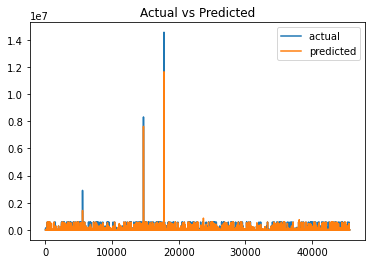

In [106]:
#actual and predicted values
dm = pd.DataFrame({'Actual': b_test, 'Predicted': b_pred}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
y1_axis=dm.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
b=plt.show()
b

In [107]:
import pickle

In [108]:
with open('yield.pickle','wb') as f:
    pickle.dump(regressor,f)

In [109]:
with open('yield.pickle','rb') as f:
    pred=pickle.load(f)

In [110]:
from sklearn.metrics import r2_score

In [111]:
print(r2_score(b_pred,b_test))

0.8197824103017162


In [112]:
df.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,3583.223250
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0,2.777778
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0,2.000000
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0,3.000000
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0,4.225000


In [113]:
def predict_yield(cropyear,area,statename,district,season,croptype):
    seasonlist=['Autumn','Kharif','Rabi','Summer','Whole Year','Winter']
    loc_index = np.where(a.columns==statename)[0][0]
    loc_index1 = np.where(a.columns==district)[0][0]
    loc_index3 = np.where(a.columns==croptype)[0][0]
    x = np.zeros(len(a.columns))
    x[0] = cropyear
    x[1] = area
    i=0
    while(i<len(seasonlist)):
        if season==seasonlist[i]:
            x[2]=i
            break
        i+=1
    if loc_index >= 0:
        x[loc_index] = 1
    if loc_index1 >= 0:
        x[loc_index1] = 1
    
    if loc_index3 >= 0:
        x[loc_index3] = 1
    

    return regressor.predict([x])[0]

In [114]:
a.columns

Index(['Crop_Year', 'Season', 'Area', '24 PARAGANAS NORTH',
       '24 PARAGANAS SOUTH', 'ADILABAD', 'AGAR MALWA', 'AGRA', 'AHMADABAD',
       'AHMEDNAGAR',
       ...
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana ', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object', length=763)

In [115]:
predict_yield(2004,52,'Andaman and Nicobar Islands','NICOBARS','Summer','Rice')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.8139415739975856